# This is a Nudity-Detection-Model (Not safe for work (NSFW))


The main idea behind this project is to detect Nudity on live video stream. This is just a sample framework created for testing purpose and can be extended for live projects as well

Due to time limitation, i am just using image for verification and not the actual video

Using a pretrained model shared by "Gant Laborde" over GITHUB.

Model is trained using mobilenetv2

In [3]:
import json
from os import listdir
from os.path import isfile, join, exists, isdir, abspath

import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

IMAGE_DIM = 224   # required/default image dimensionality

def load_images(image_paths, image_size, verbose=True):
    '''
    Function for loading images into numpy arrays for passing to model.predict
    inputs:
        image_paths: list of image paths to load
        image_size: size into which images should be resized
        verbose: show all of the image path and sizes loaded
    
    outputs:
        loaded_images: loaded images on which keras model can run predictions
        loaded_image_indexes: paths of images which the function is able to process
    
    '''
    loaded_images = []
    loaded_image_paths = []

    if isdir(image_paths):
        parent = abspath(image_paths)
        image_paths = [join(parent, f) for f in listdir(image_paths) if isfile(join(parent, f))]
    elif isfile(image_paths):
        image_paths = [image_paths]

    for img_path in image_paths:
        try:
            if verbose:
                print(img_path, "size:", image_size)
            image = keras.preprocessing.image.load_img(img_path, target_size=image_size)
            image = keras.preprocessing.image.img_to_array(image)
            image /= 255
            loaded_images.append(image)
            loaded_image_paths.append(img_path)
        except Exception as ex:
            print("Image Load Failure: ", img_path, ex)
    
    return np.asarray(loaded_images), loaded_image_paths


def load_model(model_path):
    if model_path is None or not exists(model_path):
    	raise ValueError("saved_model_path must be the valid directory of a saved model to load.")
    
    # model = tf.keras.models.load_model(model_path)
    model = tf.keras.models.load_model(model_path, custom_objects={'KerasLayer':hub.KerasLayer})
    # model.summary()
    print(model.summary())
    return model


def classify(model, input_paths, image_dim=IMAGE_DIM):
    """ Classify given a model, input paths (could be single string), and image dimensionality...."""
    images, image_paths = load_images(input_paths, (image_dim, image_dim))
    probs = classify_nd(model, images)
    return dict(zip(image_paths, probs))


def classify_nd(model, nd_images):
    """ Classify given a model, image array (numpy)...."""

    model_preds = model.predict(nd_images)
    # preds = np.argsort(model_preds, axis = 1).tolist()
    
    categories = ['drawings', 'hentai', 'neutral', 'porn', 'sexy']

    probs = []
    for i, single_preds in enumerate(model_preds):
        single_probs = {}
        for j, pred in enumerate(single_preds):
            single_probs[categories[j]] = float(pred)
        probs.append(single_probs)
    return probs


def main():   

    img_path="Swimmer1.jpg"
    model = load_model("Nudity-Detection-Model.h5")
    image_preds = classify(model, img_path, IMAGE_DIM)
    print(json.dumps(image_preds, indent=2), '\n')


if __name__ == "__main__":
	main()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              6158505   
_________________________________________________________________
dropout (Dropout)            (None, 1001)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 5010      
_________________________________________________________________
prediction (Activation)      (None, 5)                 0         
Total params: 6,163,515
Trainable params: 6,115,579
Non-trainable params: 47,936
_________________________________________________________________
None
Swimmer1.jpg size: (224, 224)
{
  "Swimmer1.jpg": {
    "drawings": 0.04502937197685242,
    "hentai": 0.023115945979952812,
    "neutral": 0.06405390053987503,
    "porn": 0.02327408827841282,
    "sexy": 0.8445267081260681
  }
} 



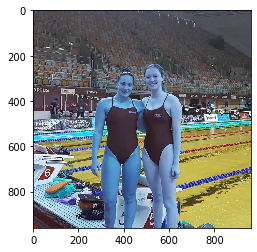

In [7]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread("Swimmer1.jpg")
plt.imshow(img)
plt.show()

{
  "Swimmer1.jpg": {
    "drawings": 0.04502937197685242,
    "hentai": 0.023115945979952812,
    "neutral": 0.06405390053987503,
    "porn": 0.02327408827841282,
    "sexy": 0.8445267081260681
  }
} 

# As you can see, above image was classified as Sexy.